In [ ]:
pip install yfinance

In [ ]:
pip install statsmodels

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.api as sm

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


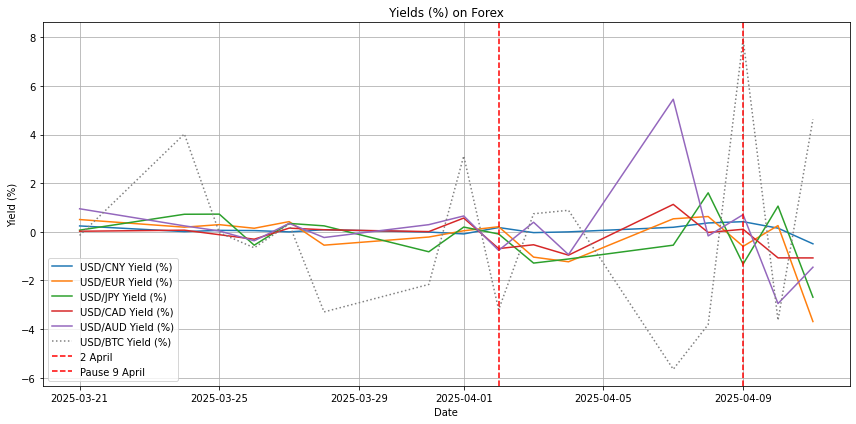

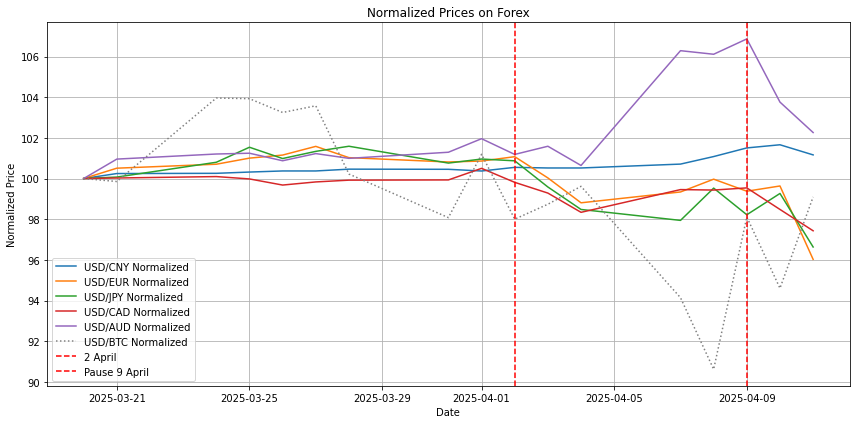

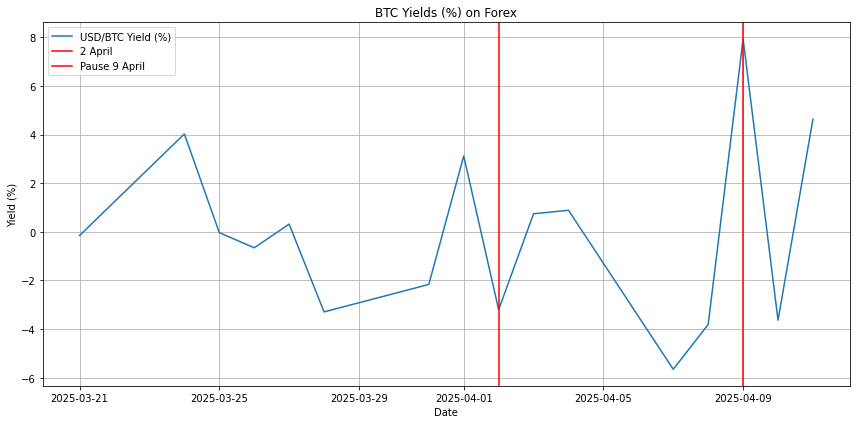

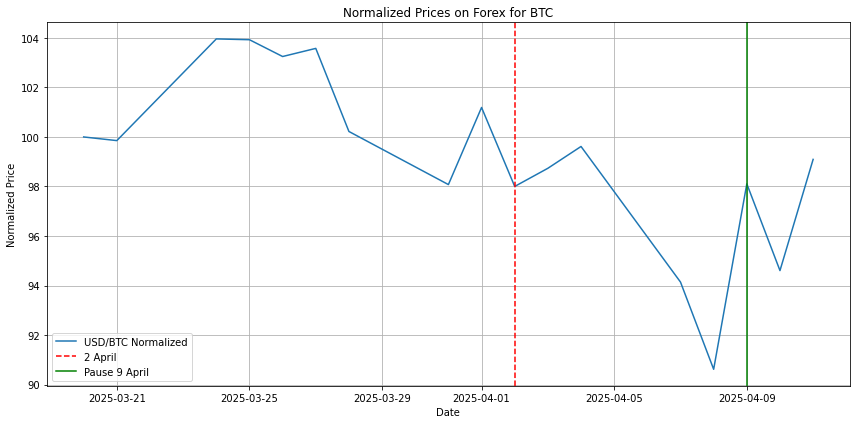

In [11]:
start_date = "2025-03-20"
end_date = "2025-04-15"
event_1 = "2025-04-02"
event_2 = "2025-04-09"

tickers = {
    "USD/CNY": "CNY=X",
    "USD/EUR": "EUR=X",
    "USD/JPY": "JPY=X",
    "USD/CAD": "CAD=X",
    "USD/AUD": "AUD=X",
    "USD/BTC": "BTC-USD"
}

data = {}
for pair, ticker in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    # print(df.head())  # Values
    if not df.empty and "Close" in df.columns:
        data[pair] = df["Close"]
    time.sleep(1.5)  # Yahoo API limit

# DataFrame Forex
forex_df = pd.concat(data.values(), axis=1)
forex_df.columns = list(data.keys())
forex_df = forex_df.dropna()

# %
returns = np.log(forex_df / forex_df.shift(1)).dropna()
returns_percentage = returns * 100

# Normalization
normalized_df = forex_df / forex_df.iloc[0] * 100

# Anayse / Plots
def analyze_event(date_str, window=3):
    event_date = pd.to_datetime(date_str)
    pre_event = returns.loc[event_date - pd.Timedelta(days=window): event_date - pd.Timedelta(days=1)]
    post_event = returns.loc[event_date + pd.Timedelta(days=1): event_date + pd.Timedelta(days=window)]

    for col in returns.columns:
        pre = pre_event[col].dropna()
        post = post_event[col].dropna()
        if len(pre) > 0 and len(post) > 0:
            t_stat, p_val = ttest_ind(pre, post, equal_var=False)
            vol_pre = pre.std()
            vol_post = post.std()
            print(f"\n🔹 {col}")
            print(f"\tMean before: {pre.mean():.4f} | after: {post.mean():.4f}")
            print(f"\tVol before: {vol_pre:.4f} | after: {vol_post:.4f}")
            print(f"\tTest t (p-value): {p_val:.4f}")

def plot_rates():
    plt.figure(figsize=(12, 6))
    
    for col in forex_df.columns:
        if col != "USD/BTC": #Ignoring BTC for comprehension
            plt.plot(returns_percentage.index, returns_percentage[col], label=f'{col} Yield (%)')
        else :
            plt.plot(returns_percentage.index, returns_percentage[col], label=f'{col} Yield (%)', linestyle='dotted', color='grey')

    plt.axvline(pd.to_datetime(event_1), color='red', linestyle='dashed', label='2 April')
    plt.axvline(pd.to_datetime(event_2), color='red', linestyle='dashed', label='Pause 9 April')
    plt.title("Yields (%) on Forex")
    plt.xlabel("Date")
    plt.ylabel("Yield (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    for col in forex_df.columns:
        if col != "USD/BTC": #Ignoring BTC for comprehension
            plt.plot(normalized_df.index, normalized_df[col], label=f'{col} Normalized')
        else :
            plt.plot(normalized_df.index, normalized_df[col], label=f'{col} Normalized', linestyle='dotted', color='grey')

    plt.axvline(pd.to_datetime(event_1), color='red', linestyle='dashed', label='2 April')
    plt.axvline(pd.to_datetime(event_2), color='red', linestyle='dashed', label='Pause 9 April')
    plt.title("Normalized Prices on Forex")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rates_BTC():
    plt.figure(figsize=(12, 6))

    for col in forex_df.columns:
        if col == "USD/BTC":
            plt.plot(returns_percentage.index, returns_percentage[col], label=f'{col} Yield (%)')

    plt.axvline(pd.to_datetime(event_1), color='red', linestyle='-', label='2 April')
    plt.axvline(pd.to_datetime(event_2), color='red', linestyle='-', label='Pause 9 April')
    plt.title("BTC Yields (%) on Forex")
    plt.xlabel("Date")
    plt.ylabel("Yield (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    for col in forex_df.columns:
        if col == "USD/BTC":
            plt.plot(normalized_df.index, normalized_df[col], label=f'{col} Normalized')

    plt.axvline(pd.to_datetime(event_1), color='red', linestyle='dashed', label='2 April')
    plt.axvline(pd.to_datetime(event_2), color='green', linestyle='-', label='Pause 9 April')
    plt.title("Normalized Prices on Forex for BTC")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting / Analysis
plot_rates()
plot_rates_BTC()
# analyze_event(event_1)
# analyze_event(event_2)

## Dataframes from the studies 

In [ ]:
# Data for the event of 2025-04-02
print("\n\tData for the event of 2025-04-02")
data_1 = {
    'Currency Pair': ['USD/CNY', 'USD/EUR', 'USD/JPY', 'USD/CAD', 'USD/AUD', 'USD/BTC'],
    'Mean Before': [-0.0005, -0.0008, -0.0031, 0.0029, 0.0048, 0.0048],
    'Mean After': [-0.0002, -0.0113, -0.0120, -0.0074, -0.0027, 0.0082],
    'Volatility Before': [0.0005, 0.0018, 0.0072, 0.0039, 0.0025, 0.0374],
    'Volatility After': [0.0002, 0.0014, 0.0012, 0.0030, 0.0094, 0.0010],
    't-Test (p-value)': [0.5734, 0.0276, 0.3244, 0.1064, 0.4568, 0.9197]
}
df_1 = pd.DataFrame(data_1)
sns.set(style="whitegrid")
df_1 = df_1.round({
    'Mean Before': 4,
    'Mean After': 4,
    'Volatility Before': 4,
    'Volatility After': 4,
    't-Test (p-value)': 4
})
df_1


	Data for the event of 2025-04-02


,Currency Pair,Mean Before,Mean After,Volatility Before,Volatility After,t-Test (p-value)
0,USD/CNY,-0.0005,-0.0002,0.0005,0.0002,0.5734
1,USD/EUR,-0.0008,-0.0113,0.0018,0.0014,0.0276
2,USD/JPY,-0.0031,-0.0120,0.0072,0.0012,0.3244
3,USD/CAD,0.0029,-0.0074,0.0039,0.0030,0.1064
4,USD/AUD,0.0048,-0.0027,0.0025,0.0094,0.4568
5,USD/BTC,0.0048,0.0082,0.0374,0.0010,0.9197


In [ ]:
# Data for the event of 2025-04-09
print("\n\tData for the event of 2025-04-09")
data_2 = {
    'Currency Pair': ['USD/CNY', 'USD/EUR', 'USD/JPY', 'USD/CAD', 'USD/AUD', 'USD/BTC'],
    'Mean Before': [0.0028, 0.0058, 0.0053, 0.0055, 0.0265, -0.0473],
    'Mean After': [-0.0017, -0.0172, -0.0081, -0.0107, -0.0220, 0.0050],
    'Volatility Before': [0.0013, 0.0007, 0.0152, 0.0082, 0.0398, 0.0130],
    'Volatility After': [0.0046, 0.0279, 0.0265, 0.0000, 0.0106, 0.0585],
    't-Test (p-value)': [0.3854, 0.4515, 0.6111, 0.2172, 0.3207, 0.4189]
}
df_2 = pd.DataFrame(data_2)
df_2 = df_2.round({
    'Mean Before': 4,
    'Mean After': 4,
    'Volatility Before': 4,
    'Volatility After': 4,
    't-Test (p-value)': 4
})
df_2


	Data for the event of 2025-04-09


,Currency Pair,Mean Before,Mean After,Volatility Before,Volatility After,t-Test (p-value)
0,USD/CNY,0.0028,-0.0017,0.0013,0.0046,0.3854
1,USD/EUR,0.0058,-0.0172,0.0007,0.0279,0.4515
2,USD/JPY,0.0053,-0.0081,0.0152,0.0265,0.6111
3,USD/CAD,0.0055,-0.0107,0.0082,0.0000,0.2172
4,USD/AUD,0.0265,-0.0220,0.0398,0.0106,0.3207
5,USD/BTC,-0.0473,0.0050,0.0130,0.0585,0.4189


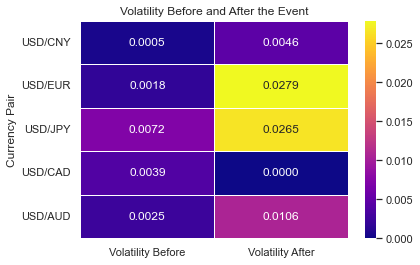

In [ ]:
# Heatmap of volatility before and after the event
heatmap_data = pd.DataFrame({
    'Volatility Before': df_1['Volatility Before'].values.flatten(),
    'Volatility After': df_2['Volatility After'].values.flatten()
}, index=df_1['Currency Pair'])
heatmap_data.drop(index=['USD/BTC'], inplace=True) # Drop BTC for better visualization
sns.heatmap(heatmap_data, annot=True, cmap="plasma", fmt='.4f', linewidths=0.5)
plt.title('Volatility Before and After the Event')
plt.show()


In [ ]:
# Yield on different time window (5 days, 10 days, 30 days)
volatility_windows = [5, 10, 30]
volatility_results = {}

for pair in forex_df.columns:
    pair_data = forex_df[pair].pct_change().dropna() 
    volatility_results[pair] = {}
    for window in volatility_windows:
        volatility_results[pair][f"Vol {window} jours"] = pair_data.rolling(window=window).std().iloc[-1]

volatility_results_df = pd.DataFrame(volatility_results)
volatility_results_df

,USD/CNY,USD/EUR,USD/JPY,USD/CAD,USD/AUD,USD/BTC
Vol 5 jours,0.003637,0.017804,0.01743,0.009230,0.032353,0.060771
Vol 10 jours,0.002587,0.012645,0.01246,0.007404,0.022217,0.043926
Vol 30 jours,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Daily returns
returns_df = forex_df.pct_change().dropna()
events = returns_df.index.isin(pd.to_datetime(['2025-04-02', '2025-04-09']))
events = events.astype(int) 

returns_df['event'] = events
X = sm.add_constant(returns_df['event'])  # Add bias
for col_name in df_2['Currency Pair'].values.flatten():
    y = returns_df[col_name]
    
    # OLS Regression
    model = sm.OLS(y, X).fit()
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                USD/CNY   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     3.152
Date:                Sat, 12 Apr 2025   Prob (F-statistic):             0.0976
Time:                        23:44:54   Log-Likelihood:                 78.331
No. Observations:                  16   AIC:                            -152.7
Df Residuals:                      14   BIC:                            -151.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.773      0.4

c:\Users\Mania\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Mania\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Mania\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Mania\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 o

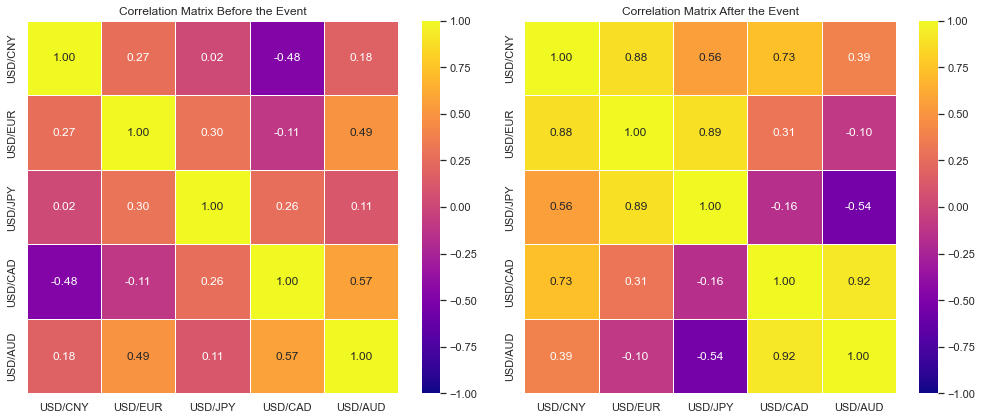

In [ ]:
#Correlation matrix before and after the event
event_dates = ['2025-04-02', '2025-04-09']
before_event = returns_df[returns_df.index < event_dates[0]].drop(columns=['USD/BTC', 'event'])
after_event = returns_df[returns_df.index >= event_dates[1]].drop(columns=['USD/BTC', 'event'])

correlation_before = before_event.corr()
correlation_after = after_event.corr()

plt.figure(figsize=(14, 6))

# Heatmaps
plt.subplot(1, 2, 1)
sns.heatmap(correlation_before, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Before the Event')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_after, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix After the Event')

plt.tight_layout()